In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
import random
from pprint import pprint
from sklearn.datasets import load_iris
%matplotlib inline

In [46]:
iris=load_iris()

In [47]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [48]:
df.columns=["sepal_l","sepal_w","petal_l","petal_w"]

In [49]:
df["label"]=iris.target

In [50]:
# df.label[df.label==0]="setosa"
# df.label[df.label==1]="verginica"
# df.label[df.label==2]="versicolor"
df.label.replace(0,"setosa",inplace=True)
df.label.replace(1,"virginica",inplace=True)
df.label.replace(2,"versicolor",inplace=True)

df

,sepal_l,sepal_w,petal_l,petal_w,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,versicolor
146,6.3,2.5,5.0,1.9,versicolor
147,6.5,3.0,5.2,2.0,versicolor
148,6.2,3.4,5.4,2.3,versicolor


In [51]:
def train_test_split(df,test_size):
    indices=df.index.tolist()
    test_indices=random.sample(population=indices,k=test_size)
    test_df=df.loc[test_indices]
    train_df=df.drop(test_indices)
    return train_df,test_df

In [88]:
train_df,test_df=train_test_split(df,40)
test_df.head()

,sepal_l,sepal_w,petal_l,petal_w,label
104,6.5,3.0,5.8,2.2,versicolor
118,7.7,2.6,6.9,2.3,versicolor
145,6.7,3.0,5.2,2.3,versicolor
16,5.4,3.9,1.3,0.4,setosa
2,4.7,3.2,1.3,0.2,setosa


In [107]:
def check_purity(data):
    label_column=data[:,-1]
    unique_classes=np.unique(label_column)
    if len(unique_classes)==1:
        return(True)
    else:
        return(False)

In [314]:
data=train_df.values

In [116]:
check_purity(train_df[train_df.petal_w>.8].values)

False

In [102]:
pd.Series(label_column).value_counts()

virginica     40
versicolor    38
setosa        32
dtype: int64

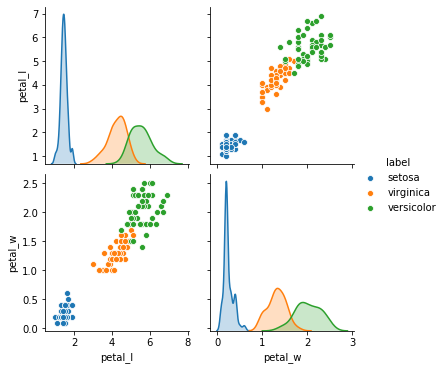

In [142]:
sns.pairplot(df,hue='label',vars=['petal_l','petal_w'])

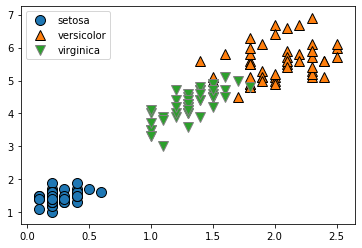

In [182]:
import mglearn
data=df.values
mglearn.discrete_scatter(data[:,3],data[:,2],data[:,4])
pl.legend(["setosa","versicolor","virginica"])

In [119]:
np.unique(test_df.label,return_counts=True)

(array(['setosa', 'versicolor', 'virginica'], dtype=object),
 array([18, 12, 10], dtype=int64))

In [120]:
np.unique(train_df.label,return_counts=True)

(array(['setosa', 'versicolor', 'virginica'], dtype=object),
 array([32, 38, 40], dtype=int64))

In [174]:
def classify_data(data):
    label_column=data[:,-1]
    unique_classes,unique_count_classes=np.unique(label_column,return_counts=True)
    index=unique_count_classes.argmax()
    classification=unique_classes[index]
    return unique_count_classes,index,classification

In [183]:
classify_data(train_df[(train_df.petal_w>0.8)&(train_df.petal_w<2)].values)

(array([17, 40], dtype=int64), 1, 'virginica')

In [223]:
def get_potential_splits(data):
    potential_splits={}
    _,n_columns=data.shape
    for column_indes in range(n_columns-1):
        potential_splits[column_indes]=[]
        values=data[:,column_indes]
        unique_values=np.unique(values)

        for index in range(len(unique_values)):
            if index!=0:
                current_value=unique_values[index]
                previous_value=unique_values[index-1]
                potential_split=(current_value+previous_value)/2

                potential_splits[column_indes].append(potential_split)
    return potential_splits

In [239]:
potential_splits=get_potential_splits(train_df.values)

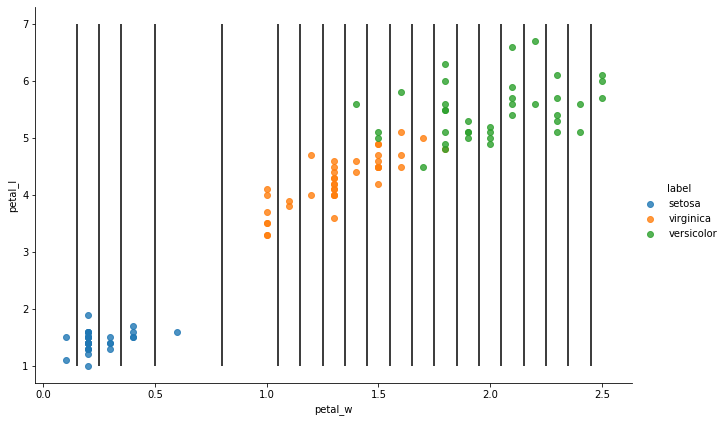

In [274]:
sns.lmplot(data=train_df,x='petal_w',y='petal_l',hue='label',fit_reg=False,
          size=6,aspect=1.5)
pl.vlines(x=potential_splits[3],ymin=1,ymax=7)
# pl.hlines(y=potential_splits[2],xmin=0,xmax=2.5)

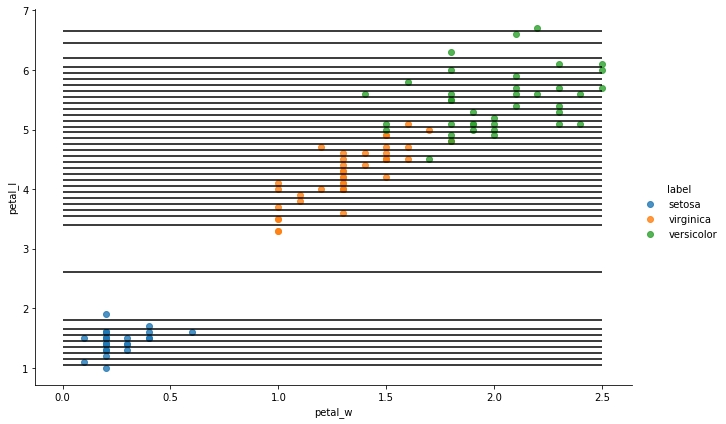

In [275]:
sns.lmplot(data=train_df,x='petal_w',y='petal_l',hue='label',fit_reg=False,
          size=6,aspect=1.5)
# pl.vlines(x=potential_splits[3],ymin=1,ymax=7)
pl.hlines(y=potential_splits[2],xmin=0,xmax=2.5)

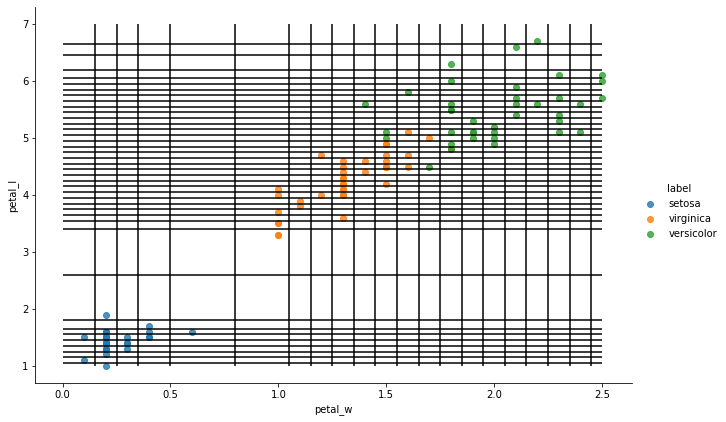

In [276]:
sns.lmplot(data=train_df,x='petal_w',y='petal_l',hue='label',fit_reg=False,
          size=6,aspect=1.5)
pl.vlines(x=potential_splits[3],ymin=1,ymax=7)
pl.hlines(y=potential_splits[2],xmin=0,xmax=2.5)

In [283]:
def split_data(data,split_column,split_value):
    split_column_values=data[:,split_column]
    data_below=data[split_column_values<=split_value]
    data_above=data[split_column_values>split_value]
    return data_below,data_above

In [287]:
data_below,data_above=split_data(data,3,0.8)

(0, 2.6)

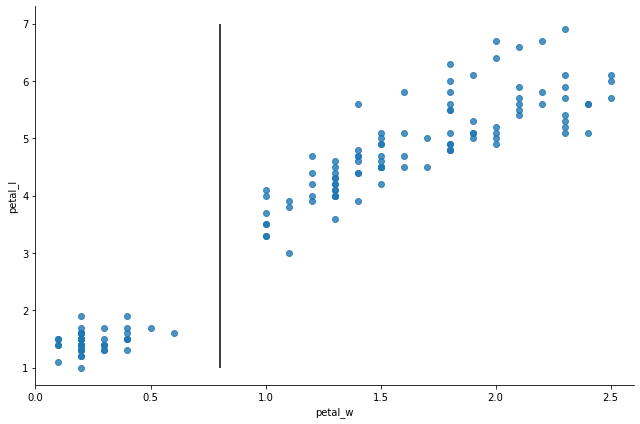

In [308]:
plotting_df=pd.DataFrame(data,columns=df.columns)
sns.lmplot(data=plotting_df,x='petal_w',y='petal_l',
          fit_reg=False,height=6,aspect=1.5)
pl.vlines(x=split_value,ymin=1,ymax=7)
pl.xlim(0,2.6)

(0, 2.6)

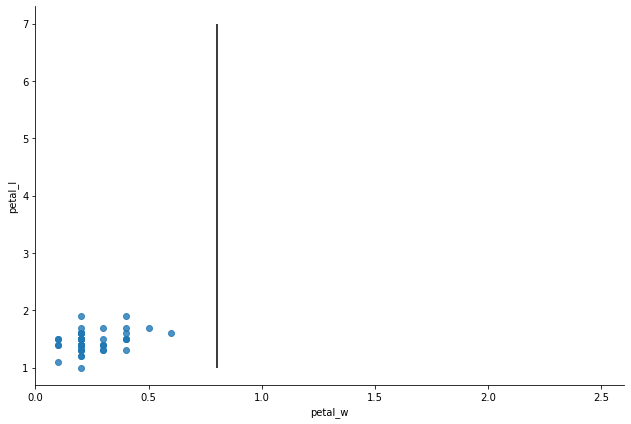

In [309]:
plotting_df=pd.DataFrame(data_below,columns=df.columns)
sns.lmplot(data=plotting_df,x='petal_w',y='petal_l',
          fit_reg=False,height=6,aspect=1.5)
pl.vlines(x=split_value,ymin=1,ymax=7)
pl.xlim(0,2.6)

(0, 2.6)

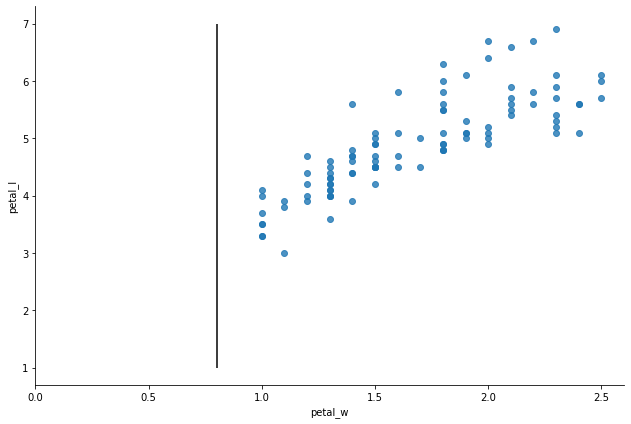

In [310]:
plotting_df=pd.DataFrame(data_above,columns=df.columns)
sns.lmplot(data=plotting_df,x='petal_w',y='petal_l',
          fit_reg=False,height=6,aspect=1.5)
pl.vlines(x=split_value,ymin=1,ymax=7)
pl.xlim(0,2.6)

In [319]:
def calculate_entropy(data):
    
    
    return entropy

In [325]:
label_column=data[:,-1]
_,counts=np.unique(label_column,return_counts=True)
probablities=counts/counts.sum()
entropy=probablities*np.log2(probablities)